### Preamble

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

In [2]:
import scipy.integrate as integrate
import matplotlib.pyplot as pyplot
import numpy as numpy

### Hill Functions

In [3]:
def hill_act(s, n, Vmax, K):
    return Vmax*(s ** n) / ((K ** n) + s ** n)

def hill_rep(s, n, Vmax, K):
    return Vmax / (1 + (s/K ** n))

# Feed Forward Loops

## Coherent Feed Forward Loop 
### AND Type Activation


<img src="../images/CFFL1.png" alt="CFFL1" width="300"/>

### Short Pulse

In [4]:
def pulse(t,c,start,end):
        if t >= end:
            return -100.0*c if c > 0.0 else 0.0
        
        if t >= start:
            return 100*(1.0-c) if c <= 1.0 else 0.0
        return 0.0


def cffl_and(conc, t):
    A,B,C = conc
    Vmax_B = 0.05
    deg_B = 0.05
    deg_C = 2.0
    Vmax_C = 2.0
    K_AB = 0.1
    K_AC = 0.5
    K_BC = 1.0
    n = 6
    return [
        pulse(t,A,4.0,10.0),
        hill_act(A,n,Vmax_B,K_AB) - deg_B*B,
        hill_act(B,n,Vmax_C,K_BC) * hill_act(A,n,Vmax_C,K_AC) - deg_C * C
    ]
    
    

In [5]:
initial = [0.0,0.0,0.0]
t = numpy.linspace(0,200,10000)
result = integrate.odeint(cffl_and,initial,t)

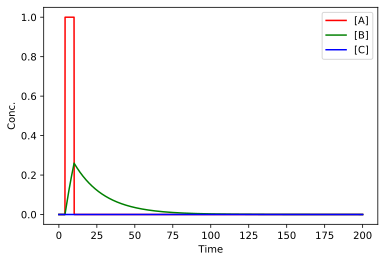

In [6]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.plot(t,result[:,0],'r',label='[A]')
pyplot.plot(t,result[:,1],'g',label='[B]')
pyplot.plot(t,result[:,2],'b',label='[C]')

ax.set_xlabel('Time')
ax.set_ylabel('Conc.')
pyplot.legend()

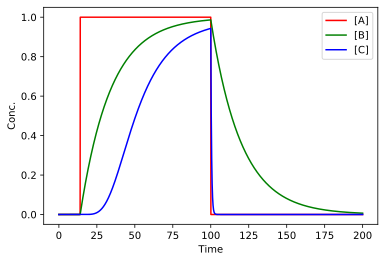

In [7]:
def pulse(t,c,start,end):
        if t >= end:
            return -100.0*c if c > 0.0 else 0.0
        
        if t >= start:
            return 100*(1.0-c) if c <= 1.0 else 0.0
        return 0.0


def cffl_and(conc, t):
    A,B,C = conc
    Vmax_B = 0.05
    deg_B = 0.05
    deg_C = 2.0
    Vmax_C = 2.0
    K_AB = 0.1
    K_AC = 0.5
    K_BC = 1.0
    n = 6
    return [
        pulse(t,A,14.0,100.0),
        hill_act(A,n,Vmax_B,K_AB) - deg_B*B,
        hill_act(B,n,Vmax_C,K_BC) * hill_act(A,n,Vmax_C,K_AC) - deg_C * C
    ]
    
initial = [0.0,0.0,0.0]
t = numpy.linspace(0,200,10000)
result = integrate.odeint(cffl_and,initial,t)

fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.plot(t,result[:,0],'r',label='[A]')
pyplot.plot(t,result[:,1],'g',label='[B]')
pyplot.plot(t,result[:,2],'b',label='[C]')

ax.set_xlabel('Time')
ax.set_ylabel('Conc.')
pyplot.legend()

### OR Type Activation

<img src="../images/CFFL2.png" alt="CFFL2" width="300" />

In [8]:
def cffl_or(conc, t):
    A,B,C = conc
    Vmax_B = 0.1
    deg_B = 0.1
    deg_C = 0.5
    Vmax_C = 0.5
    K_AB = 0.1
    K_AC = 0.1
    K_BC = 0.1
    n = 20
    return [
        pulse(t,A,34.0,80.0),
        hill_act(A,n,Vmax_B,K_AB) - deg_B*B,
        hill_act(A,n,Vmax_C/10,K_AC) + hill_act(B,n,9*Vmax_C/10,K_BC) - deg_C * C
    ]
    

In [9]:
initial = [0.0,0.0,0.0]
t = numpy.linspace(0,200,10000)
result = integrate.odeint(cffl_or,initial,t)

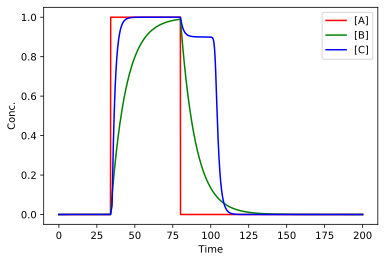

In [10]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.plot(t,result[:,0],'r',label='[A]')
pyplot.plot(t,result[:,1],'g',label='[B]')
pyplot.plot(t,result[:,2],'b',label='[C]')

ax.set_xlabel('Time')
ax.set_ylabel('Conc.')
pyplot.legend()


## Incoherent Feed Forward Loop 
### NAND Type Activation


<img src="../images/IFFL1.png" alt="IFFL1" width="300" />

In [11]:
def iffl_and(conc, t):
    A,B,C = conc
    Vmax_B = 2
    deg_B = 1
    deg_C = 2
    Vmax_C = 2
    K_AB = 1
    K_AC = 0.3
    K_BC = 0.5
    n = 10
    return [
        0.01 - 0.01*A,
        hill_act(A,n,Vmax_B,K_AB) - deg_B*B,
        hill_rep(B,n,Vmax_C,K_BC)*hill_act(A,n,Vmax_C,K_AC) - deg_C*C]

In [12]:
initial = [0.0,0.0,0.0]
t = numpy.linspace(0,500,1000)
result = integrate.odeint(iffl_and,initial,t)

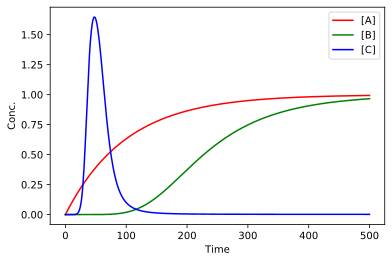

In [13]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.plot(t,result[:,0],'r',label='[A]')
pyplot.plot(t,result[:,1],'g',label='[B]')
pyplot.plot(t,result[:,2],'b',label='[C]')

ax.set_xlabel('Time')
ax.set_ylabel('Conc.')
pyplot.legend()